In [1]:
import numpy as np
import pandas as pd
import requests
import json
import sys
import tweepy
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Gathering

In [2]:
#download file manually
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#get image prediction fie using the request library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
file_name = 'image_predictions.tsv'
with open(file_name, mode = 'wb') as file:
    file.write(response.content)

In [5]:
#read the tsv file as a pandas csv dataframe
img_df = pd.read_csv('image_predictions.tsv', sep='\t')
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
CONSUMER_KEY = 'CONSUMER KEY HERE'
CONSUMER_SECRET = 'CONSUMER SECRET HERE'
OAUTH_TOKEN = 'OAUTH TOKEN'
OAUTH_TOKEN_SECRET = 'OAUTH SECRET'

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [7]:
# get data from Twitter API
with open('tweet_json.txt','w') as outfile:
    for tweet_id in twitter_archive['tweet_id']:
        # handling exception
        try:
            tweet = api.get_status(tweet_id ,tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write("\n")
        except:
            e = os.sys.exc_info()[0]
            

Rate limit reached. Sleeping for: 88
Rate limit reached. Sleeping for: 107


In [8]:
# state keys to be kept as columns for the api dataframe
keys_to_keep = ['id', 'favorite_count','lang', 'retweet_count']

# create dictionary to keep the data
data = []
with open('tweet_json.txt', 'r') as r: 
    json_tweet = r.readline()
    #read tweet_json.txt line by line
    while json_tweet:
        tweet_dictionary = json.loads(json_tweet)
        data_row = dict((key, tweet_dictionary[key]) for key in keys_to_keep)
        data.append(data_row)
        json_tweet = r.readline()
        
            
# create DataFrame    
api_df = pd.DataFrame.from_dict(data)


api_df.head()

,id,favorite_count,lang,retweet_count
0,892420643555336193,33811,en,7003
1,892177421306343426,29324,en,5301
2,891815181378084864,22044,en,3478
3,891689557279858688,36929,en,7224
4,891327558926688256,35308,en,7757


In [10]:
api_df.shape

(2327, 4)

In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
# Make copies of each dataframe
api_df_clean = api_df.copy()
twitter_archive_clean = twitter_archive.copy()
img_df_clean = img_df.copy()


In [14]:
api_df_clean.head()

,id,favorite_count,lang,retweet_count
0,892420643555336193,33811,en,7003
1,892177421306343426,29324,en,5301
2,891815181378084864,22044,en,3478
3,891689557279858688,36929,en,7224
4,891327558926688256,35308,en,7757


In [15]:
api_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
id                2327 non-null int64
favorite_count    2327 non-null int64
lang              2327 non-null object
retweet_count     2327 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [16]:
img_df_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
img_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Assess Data

#### Quality issues


twitter_archive <br>
- Some rows have indefinite articles representing dog names in the name column
- Name column has ordinary words (e.g such, this, just)  wrongly extracted as name
- timestamp with wrong data type
- numbers after decimal point extracted as numerator rating for tweets with decimal numbers as numerator rating 
- multiple tweets with wrongly assigned numerator ratings
    case 1: tweet(index number 313 ) with 960 numerator rating instead of 13
    case 2: tweet(index number 1202)  numerator rating should be 11 not 50  

img_df <br>
- Inconsistent name case for p1, p2 and p3
- no column to show whether the image is a dog or not based on image prediction

### Tidiness issues
The dataset should have just two tables (twitter_archive and twitter API should be one table as they have the same type of observational unit). The dog stages columns should be one column in twitter_archive table (Each variable forms a column)

- retweet_count, favourite_count should be part of **twitter_archive** table
- one variable (dog stage) in four columns in **twitter_archive** table (doggo, puppo,pupper, floffer) 

## Clean

#### twitter_archive: Numbers after decimal point extracted as numerator rating for tweets with decimal numbers as numerator rating
#### Define
- Extract decimal ratings from the text column using regex expression and manually enter the correct ratings 

#### Code

In [19]:
decimal_extract =twitter_archive_clean['text'].astype(str).str.extract('([0-9]+\.[0-9]+)')

In [20]:
decimal_extract.dropna(inplace=True)

In [21]:
decimal_extract

,0
45,13.5
259,2.4
340,9.75
695,9.75
763,11.27
1018,2.0
1294,4.3
1689,9.5
1712,11.26
1768,92.49


In [22]:
twitter_archive_clean.loc[twitter_archive.index == 45, 'rating_numerator'] = 13.5
twitter_archive_clean.loc[twitter_archive.index == 259, 'rating_numerator'] = 2.4
twitter_archive_clean.loc[twitter_archive.index == 340, 'rating_numerator'] = 9.75
twitter_archive_clean.loc[twitter_archive.index == 695, 'rating_numerator'] = 9.75
twitter_archive_clean.loc[twitter_archive.index == 763, 'rating_numerator'] = 11.27
twitter_archive_clean.loc[twitter_archive.index == 1018, 'rating_numerator'] = 2.0
twitter_archive_clean.loc[twitter_archive.index == 1294, 'rating_numerator'] = 4.3
twitter_archive_clean.loc[twitter_archive.index == 1689, 'rating_numerator'] = 9.5
twitter_archive_clean.loc[twitter_archive.index == 1712, 'rating_numerator'] = 11.26
twitter_archive_clean.loc[twitter_archive.index == 1768, 'rating_numerator'] = 92.49
twitter_archive_clean.loc[twitter_archive.index == 1790, 'rating_numerator'] = 5.7
twitter_archive_clean.loc[twitter_archive.index == 2347,'rating_numerator'] = 8.98

#### Test

In [23]:
twitter_archive_clean['rating_numerator'][45]

13.5

> **twitter_archive: Some rows have indefinite articles representing dog names in the name column**

#### Define
- Replace the rows with indefinite articles as name with None

#### Code

In [24]:
#get rows with such names
twitter_archive_clean[(twitter_archive_clean['name'] == 'a') | (twitter_archive_clean['name'] == 'an')|(twitter_archive_clean['name'] == 'the')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14.00,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13.00,10,a,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10.00,10,an,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10.00,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8.00,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4.00,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11.00,10,a,None,None,None,None
1025,746369468511756288,NaN,NaN,2016-06-24 15:48:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Iraqi Speed Kangaroo. It is not a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746369468...,9.00,10,an,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12.00,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11.00,10,a,None,None,None,None


In [25]:
twitter_archive_clean.loc[(twitter_archive_clean['name'] == 'a') |
                          (twitter_archive_clean['name'] == 'an')|(twitter_archive_clean['name'] == 'the'), 'name'] = 'None'

#### Test

In [26]:
twitter_archive_clean[twitter_archive_clean.name == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [27]:
twitter_archive_clean[twitter_archive_clean.name == 'an']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [28]:
twitter_archive_clean[twitter_archive_clean.name == 'the']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


> **twitter_archive: No column to show whether the image is a dog or not based on image prediction**

#### Define
- Create new column named image_prediction to show whether the image is a dog or not based on the 3 prediction tests

#### Code

In [29]:
img_df_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [30]:
img_df[(img_df_clean['p1_dog'] == False)&(img_df_clean['p2_dog'] == False)&(img_df_clean['p3_dog'] == False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


In [31]:
# Create empty column
img_df_clean['image_prediction'] = ""

In [32]:
#condition for 'not dog' values
img_df_clean.loc[(img_df_clean['p1_dog'] == False)&(img_df_clean['p2_dog'] == False)&(img_df_clean['p3_dog'] == False), 'image_prediction'] = 'not dog'

In [33]:
#condition for 'dog' values
img_df_clean.loc[(img_df_clean['p1_dog'] == True)|(img_df_clean['p2_dog'] == True)|(img_df_clean['p3_dog'] == True), 'image_prediction'] = 'dog'

In [34]:
img_df_clean['image_prediction'].value_counts()

dog        1751
not dog     324
Name: image_prediction, dtype: int64

> **Inconsistent name case for p1, p2 and p3**

#### Define
- Change all names in p1, p2 and p3 columns to lower case

#### Code

In [35]:
img_df_clean['p1'] = img_df['p1'].str.lower()
img_df_clean['p2'] = img_df['p2'].str.lower()
img_df_clean['p3'] = img_df['p3'].str.lower()

#### Test

In [36]:
img_df_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,image_prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True,dog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,dog
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,dog
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,dog
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,dog


> **twitter_archive: Name column has ordinary words (e.g such, this, just)  wrongly extracted as name**

#### Code

In [37]:
# Extract rows where the value in the name column starts with a lower case letter(since actual names start with capital letters)
ordinary_words = twitter_archive_clean['name'].astype(str).str.extract('^([a-z]+)')

In [38]:
#drop null rows
ordinary_words.dropna(inplace =True)

In [39]:
#getting the words
ordinary_words[0].value_counts()

very            5
quite           4
just            4
one             4
actually        2
mad             2
getting         2
not             2
my              1
infuriating     1
all             1
his             1
such            1
officially      1
this            1
life            1
incredibly      1
old             1
unacceptable    1
space           1
by              1
light           1
Name: 0, dtype: int64

In [40]:
# replacing the words with None
replace_values = {'very': 'None', 'quite': 'None', 'just':'None','one':'None', 'getting': 'None', 'actually': 'None', 'not':'None', 
                  'mad':'None', 'his':'None','light':'None', 'my':'None','unacceptable':'None', 'this':'None', 'incredibly': 'None', 
                  'infuriating':'None','life':'None', 'space':'None', 'all':'None','by':'None','old':'None','officially':'None','such':'None'}


In [41]:
twitter_archive_clean = twitter_archive_clean.replace({'name': replace_values})

In [42]:
twitter_archive_clean[twitter_archive_clean.name == "very"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Test

In [43]:
twitter_archive_clean['name'].astype(str).str.extract('^([a-z]+)').sum()

0    0.0
dtype: float64

> **timestamp with wrong data type**

#### Define
- Convert timestamp datatype to datetime

#### Code

In [44]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [45]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime6

#### Tweets with wrongly extracted ratings

- tweet (index number 313) with 960 numerator rating instead of 13 and tweet (index number 1202) numerator rating should be 11 not 50


#### Define
- Locate the tweet's with those numerator ratings, check through the text and assign the correct ratings

#### Code

In [46]:
twitter_archive_clean.loc[twitter_archive['rating_numerator'] == 960, 'rating_numerator'] = 13
twitter_archive_clean.loc[twitter_archive['rating_numerator'] == 50, 'rating_numerator'] = 11

#### Test

In [47]:
twitter_archive_clean.iloc[313:314, :].rating_numerator

313    13.0
Name: rating_numerator, dtype: float64

In [48]:
twitter_archive_clean.iloc[1202:1203, :].rating_numerator

1202    11.0
Name: rating_numerator, dtype: float64

### Tidiness

#### one variable (dog stage) in four columns in twitter_archive table

#### Define
- Melt doggo, puppo,pupper and floffer columns to dog_stage and dog_stage_name columns. create a new dataframe with just rows that have dog stage name.Add this new dataframe's column to the twitter_archive_clean dataframe.

#### Code

In [49]:
twitter_archive_clean['doggo'].replace('None', '', inplace=True)
twitter_archive_clean['puppo'].replace('None', '', inplace=True)
twitter_archive_clean['pupper'].replace('None', '', inplace=True)
twitter_archive_clean['floofer'].replace('None', '', inplace=True)

In [50]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.00,10,Phineas,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.00,10,Tilly,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.00,10,Archie,,,,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.00,10,Darla,,,,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.00,10,Franklin,,,,
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13.00,10,None,,,,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.00,10,Jax,,,,
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13.00,10,None,,,,
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13.00,10,Zoey,,,,
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14.00,10,Cassie,doggo,,,


In [51]:
twitter_archive_clean['dog_stage_name'] = twitter_archive_clean['doggo'] + twitter_archive_clean['puppo'] + twitter_archive_clean['pupper']+twitter_archive_clean['floofer']

In [52]:
twitter_archive_clean['dog_stage_name'].value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_stage_name, dtype: int64

In [53]:
twitter_archive_clean['dog_stage_name'].replace('', np.nan, inplace=True)

In [54]:
twitter_archive_clean['dog_stage_name'].value_counts()

pupper          245
doggo            83
puppo            29
doggopupper      12
floofer           9
doggopuppo        1
doggofloofer      1
Name: dog_stage_name, dtype: int64

In [55]:
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1, inplace=True)

In [56]:
twitter_archive_clean.loc[twitter_archive_clean['dog_stage_name'] == 'doggopuppo', 'dog_stage_name'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean['dog_stage_name'] == 'doggopupper', 'dog_stage_name'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean['dog_stage_name'] == 'doggofloofer', 'dog_stage_name'] = 'doggo, floofer'

In [57]:
twitter_archive_clean['dog_stage_name'].value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage_name, dtype: int64

#### Test

In [58]:
#twitter_archive_clean

> **twitter_archive: Retweet count and favourite count should be part of twitter_archive table**

#### Define
- Merge both twitter_archive and api_df together, joining on tweet_id

#### Code

In [59]:
#rename api_df id to tweet_id
api_df_clean =api_df_clean.rename(columns={'id':'tweet_id'})

In [60]:
twitter_archive_api_clean = pd.merge(twitter_archive_clean, api_df_clean, on='tweet_id', how='left')

# Further Assessment and Cleaning

### Quality
#### twitter_archive_api_clean
- irrelevant columns for analysis
- None strings and null values should be 
- Year and month columns needed for analysis
- convert rating_numerator to integer data type


#### twitter_archive_master
- outliers in rating_numerator column
- Erroneous data types (tweet_id, rating_numerator, rating_denominator, retweet_count and favorites_count)
#### twitter_archive_master_clean
- null values in image_prediction colum
- null values in retweet_count, lang and favorite_count columns

### Tidiness
#### twitter_archive_api_clean
- new year and month columns for analysis
#### twitter_archive_master_clean
- new column for best dog breed prediction
- new column for ratings rate

### Drop irrelevant columns in twitter_archive_api_clean

#### Define
- Remove irrelevant columns

#### Code

In [61]:
twitter_archive_api_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage_name', 'favorite_count',
       'lang', 'retweet_count'],
      dtype='object')

In [62]:
twitter_archive_api_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                'retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','source'], axis=1, inplace=True)

#### Test

In [63]:
twitter_archive_api_clean.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage_name', 'favorite_count',
       'lang', 'retweet_count'],
      dtype='object')

#### Eroneous data types. tweet_id should be object not integer, rating_numerator and rating_denominator should be floats not integers and retweet_count and favorites_count should be integers not floats. 
#### Define
change the datatypes to the appropirate one

#### Code

In [64]:
twitter_archive_api_clean['tweet_id'] =twitter_archive_api_clean['tweet_id'].astype(object)
twitter_archive_api_clean['rating_numerator'] =twitter_archive_api_clean['rating_numerator'].astype(float)
twitter_archive_api_clean['rating_denominator'] =twitter_archive_api_clean['rating_denominator'].astype(float)

#### Test

In [65]:
twitter_archive_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns, UTC]
text                  2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  2356 non-null object
dog_stage_name        380 non-null object
favorite_count        2327 non-null float64
lang                  2327 non-null object
retweet_count         2327 non-null float64
dtypes: datetime64[ns, UTC](1), float64(4), object(5)
memory usage: 202.5+ KB


### Change None to Null values

#### Define
- Convert None values and strings to null values 

#### Code

In [66]:
#Replace None strings with null values
twitter_archive_api_clean.replace(to_replace= 'None', value=np.nan, inplace=True)

In [67]:
#replace None value with null values
#twitter_archive_api_clean.replace(to_replace= [None], value=np.nan, inplace=True)


#### Test

In [68]:
#testing for None values
#twitter_archive_api_clean[twitter_archive_api_clean.name == None]

In [69]:
#testing for None strings
twitter_archive_api_clean[twitter_archive_api_clean.name == 'None']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage_name,favorite_count,lang,retweet_count


### Create year, month column

#### Define
- create two new columns for year and month and extract year and month values from timestamp column. Replace month numbers with month in words

#### Code

In [70]:
twitter_archive_api_clean['year'] = twitter_archive_api_clean['timestamp'].dt.year

In [71]:
twitter_archive_api_clean['month'] = twitter_archive_api_clean['timestamp'].dt.month

In [72]:
twitter_archive_api_clean.loc[twitter_archive_api_clean['month'] == 1, 'month'] = 'January'
twitter_archive_api_clean.loc[twitter_archive_api_clean['month'] == 2, 'month'] = 'Feburary'
twitter_archive_api_clean.loc[twitter_archive_api_clean['month'] == 3, 'month'] = 'March'
twitter_archive_api_clean.loc[twitter_archive_api_clean['month'] == 4, 'month'] = 'April'
twitter_archive_api_clean.loc[twitter_archive_api_clean['month'] == 5, 'month'] = 'May'
twitter_archive_api_clean.loc[twitter_archive_api_clean['month'] == 6, 'month'] = 'June'
twitter_archive_api_clean.loc[twitter_archive_api_clean['month'] == 7, 'month'] = 'July'
twitter_archive_api_clean.loc[twitter_archive_api_clean['month'] == 8, 'month'] = 'August'
twitter_archive_api_clean.loc[twitter_archive_api_clean['month'] == 9, 'month'] = 'September'
twitter_archive_api_clean.loc[twitter_archive_api_clean['month'] == 10, 'month'] = 'October'
twitter_archive_api_clean.loc[twitter_archive_api_clean['month'] == 11, 'month'] = 'November'
twitter_archive_api_clean.loc[twitter_archive_api_clean['month'] == 12, 'month'] = 'December'


#### Test

In [73]:
twitter_archive_api_clean.month.values

array(['August', 'August', 'July', ..., 'November', 'November',
       'November'], dtype=object)

## Merge all datasets

In [74]:
twitter_archive_master = pd.merge(twitter_archive_api_clean, img_df_clean, on='tweet_id', how='left')

In [75]:
twitter_archive_master.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage_name', 'favorite_count',
       'lang', 'retweet_count', 'year', 'month', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'image_prediction'],
      dtype='object')

In [76]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

In [77]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [78]:
twitter_archive_master.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stage_name', 'favorite_count',
       'lang', 'retweet_count', 'year', 'month', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'image_prediction'],
      dtype='object')

In [79]:
twitter_archive_master

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage_name,favorite_count,lang,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,image_prediction
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.00,10.0,Phineas,NaN,33811.0,en,7003.0,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,not dog
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.00,10.0,Tilly,NaN,29324.0,en,5301.0,...,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,dog
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.00,10.0,Archie,NaN,22044.0,en,3478.0,...,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,dog
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.00,10.0,Darla,NaN,36929.0,en,7224.0,...,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,dog
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.00,10.0,Franklin,NaN,35308.0,en,7757.0,...,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,dog
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13.00,10.0,NaN,NaN,17807.0,en,2600.0,...,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False,dog
6,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,13.00,10.0,Jax,NaN,10359.0,en,1661.0,...,appenzeller,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False,dog
7,890729181411237888,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,13.00,10.0,NaN,NaN,56858.0,en,15753.0,...,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True,dog
8,890609185150312448,2017-07-27 16:25:51+00:00,This is Zoey. She doesn't want to be one of th...,13.00,10.0,Zoey,NaN,24520.0,en,3619.0,...,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True,dog
9,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,14.00,10.0,Cassie,doggo,27957.0,en,6098.0,...,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True,dog


### Clean Merged dataset

#### Function to remove outliers

In [80]:
def remove_outliers (DataFrame, target_column):
    Q1 = DataFrame[target_column].quantile(0.25)
    Q3 = DataFrame[target_column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_1 = Q1 - 1.5 * IQR
    outlier_2 = Q3 + 1.5 * IQR
    
    DataFrame = DataFrame.loc[((DataFrame[target_column] < outlier_1) | (DataFrame[target_column] > outlier_2 ))]
    return DataFrame
    
    

####  Remove Outlier rows based on numerator ratings
#### Define
- Hold rows with rating_numerator outliers. Delete these rows from the dataframe by reversing the .isin() method on the twitter_archive_master_outliers dataframe. Hold the rows without outliers in twitter_archive_master_clean


#### Code

In [81]:
#hold ouliers in a different dataframe
twitter_archive_master_outliers = remove_outliers(twitter_archive_master, 'rating_numerator')

In [82]:
#delete intersecting rows(outlier rows) and return dataframe with no outliers named twitter_archive_master_clean
twitter_archive_master_clean = twitter_archive_master[~twitter_archive_master['rating_numerator'].isin
                                                      (twitter_archive_master_outliers['rating_numerator'])]

#### Test

In [83]:
twitter_archive_master_clean.rating_numerator.value_counts()

12.00    557
11.00    464
10.00    461
13.00    350
9.00     156
8.00     102
7.00      55
14.00     54
9.75       2
15.00      2
8.98       1
11.27      1
11.26      1
9.50       1
13.50      1
Name: rating_numerator, dtype: int64

In [84]:
twitter_archive_master_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage_name,favorite_count,lang,retweet_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,image_prediction
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13.00,10.0,Phineas,NaN,33811.0,en,7003.0,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,not dog
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,13.00,10.0,Tilly,NaN,29324.0,en,5301.0,...,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,dog
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.00,10.0,Archie,NaN,22044.0,en,3478.0,...,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,dog
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.00,10.0,Darla,NaN,36929.0,en,7224.0,...,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,dog
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.00,10.0,Franklin,NaN,35308.0,en,7757.0,...,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,dog
5,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13.00,10.0,NaN,NaN,17807.0,en,2600.0,...,chesapeake_bay_retriever,0.425595,True,irish_terrier,0.116317,True,indian_elephant,0.076902,False,dog
6,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,13.00,10.0,Jax,NaN,10359.0,en,1661.0,...,appenzeller,0.341703,True,border_collie,0.199287,True,ice_lolly,0.193548,False,dog
7,890729181411237888,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,13.00,10.0,NaN,NaN,56858.0,en,15753.0,...,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True,dog
8,890609185150312448,2017-07-27 16:25:51+00:00,This is Zoey. She doesn't want to be one of th...,13.00,10.0,Zoey,NaN,24520.0,en,3619.0,...,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True,dog
9,890240255349198849,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,14.00,10.0,Cassie,doggo,27957.0,en,6098.0,...,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True,dog


> check for null values in the new dataframe

In [85]:
#check for columns with null values that can affect analysis and visualisation
twitter_archive_master_clean.isnull().sum()

tweet_id                 0
timestamp                0
text                     0
rating_numerator         0
rating_denominator       0
name                   760
dog_stage_name        1833
favorite_count          29
lang                    29
retweet_count           29
year                     0
month                    0
jpg_url                269
img_num                269
p1                     269
p1_conf                269
p1_dog                 269
p2                     269
p2_conf                269
p2_dog                 269
p3                     269
p3_conf                269
p3_dog                 269
image_prediction       269
dtype: int64

- Observation 1: favorite_count, lang and retweet_count from the api_df dataframe have 29 rows with null values.
- Observation 2: All columns merged from from the img_df dtaframe have 269 null values.
    

#### Drop rows where image_prediction is null
#### Define
All columns from the img_df dataset have 269 null values. we have to drop all these null values to have a cleaner dataset to work with by calling the dropna method on the dataframe. <br>
**Note:** Dropping null values in one of the columns will affect the other columns from img_df dataframe

#### Code

In [86]:
twitter_archive_master_clean= twitter_archive_master_clean.dropna( subset=['image_prediction'], axis=0)

#### Test

In [87]:
twitter_archive_master_clean.image_prediction.value_counts()

dog        1690
not dog     249
Name: image_prediction, dtype: int64

#### Drop null values from the api_df columns in the twitter_archive_master_clean dataframe
#### Define
After merging tweet ids without retweet_count, lang and favorite_count values returned as null. We have to drop these rows to have a cleaner data by calling the dropna method on the dataframe.<br>
**Note**: Dropping null values in one of the columns will affect the other two

#### Code

In [88]:
twitter_archive_master_clean= twitter_archive_master_clean.dropna( subset=['favorite_count'], axis=0)

#### Test

In [89]:
twitter_archive_master_clean.isnull().sum()

tweet_id                 0
timestamp                0
text                     0
rating_numerator         0
rating_denominator       0
name                   589
dog_stage_name        1608
favorite_count           0
lang                     0
retweet_count            0
year                     0
month                    0
jpg_url                  0
img_num                  0
p1                       0
p1_conf                  0
p1_dog                   0
p2                       0
p2_conf                  0
p2_dog                   0
p3                       0
p3_conf                  0
p3_dog                   0
image_prediction         0
dtype: int64

#### Analysis Note on name and dog_stage_name column <br>
Both name and dog_stage_name column will be left as they both contain a large number of null values. Therefore, null values in the name column will be regarded as 'No name' while null values in the dog_stage_name column sill be regarded as 'no dog stage name'

#### Erroneous datatypes for rewtweet_count and favorite_count
#### Define
Change retweet_count and favorite_count data types to integer

#### Code

In [90]:
twitter_archive_api_clean['favorite_count'] =twitter_archive_api_clean['favorite_count'].fillna(0)
twitter_archive_api_clean['retweet_count'] =twitter_archive_api_clean['retweet_count'].fillna(0)
twitter_archive_api_clean['favorite_count'] =twitter_archive_api_clean['favorite_count'].astype(int)
twitter_archive_api_clean['retweet_count'] =twitter_archive_api_clean['retweet_count'].astype(int)

#### Test

In [125]:
twitter_archive_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns, UTC]
text                  2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null float64
name                  1502 non-null object
dog_stage_name        380 non-null object
favorite_count        2356 non-null int32
lang                  2327 non-null object
retweet_count         2356 non-null int32
year                  2356 non-null int64
month                 2356 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int32(2), int64(2), object(5)
memory usage: 220.9+ KB


### Get most confident dog breed based on prediction test (p1)

#### Define
- Extract rows where the prediction was True (i.e. a dog) for p1 column

#### Code

In [91]:
predicted_breed = twitter_archive_master_clean[twitter_archive_master_clean['p1_dog']== True]

#### Test

In [92]:
predicted_breed.p1_dog.value_counts()

True    1474
Name: p1_dog, dtype: int64

### New column named Ratings rate to get the each tweets rating rate

#### Define
- Divide the rating_numerator column by the rating_denominator column to get rate

#### Code

In [93]:
twitter_archive_master_clean['rating_rate'] = twitter_archive_master_clean['rating_numerator']/twitter_archive_master_clean['rating_denominator']

#### Test

### Final dataframe shape

In [94]:
twitter_archive_master_clean.shape

(1921, 25)

# Analysis and Visualisation

### Insights on retweet 
Assessed data used: api_df<br>
cleaned data used : twitter_archive_master_clean data

In [95]:
twitter_archive_master_clean.retweet_count.describe()

count     1921.000000
mean      2458.136387
std       4249.091414
min         11.000000
25%        515.000000
50%       1185.000000
75%       2854.000000
max      70708.000000
Name: retweet_count, dtype: float64

### Dog image with the highest retweet

In [121]:
highest_retweet_df = twitter_archive_master_clean.loc[twitter_archive_master_clean.retweet_count == 70708.0 ]


In [122]:
highest_retweet_df

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage_name,favorite_count,lang,retweet_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,image_prediction,rating_rate
1039,744234799360020481,2016-06-18 18:26:18+00:00,Here's a doggo realizing you can stand in a po...,13.0,10.0,NaN,doggo,144847.0,en,70708.0,...,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,dog,1.3


In [123]:
# get full image url for the highest retweeted tweet
for ind, rw in twitter_archive_master_clean.iterrows():
    if rw['retweet_count']==70708.0:
        pic_url = twitter_archive_master_clean.jpg_url[ind]
        tweet_text = twitter_archive_master_clean.text[ind]
        id =twitter_archive_master_clean.tweet_id[ind]
        print ('img_url: ', pic_url)
        print ('Tweet text: ', tweet_text)
        print ('tweet id: ', id)

img_url:  https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg
Tweet text:  Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
tweet id:  744234799360020481


In [124]:
#getting dog breed
highest_retweet_df.p1

1039    labrador_retriever
Name: p1, dtype: object

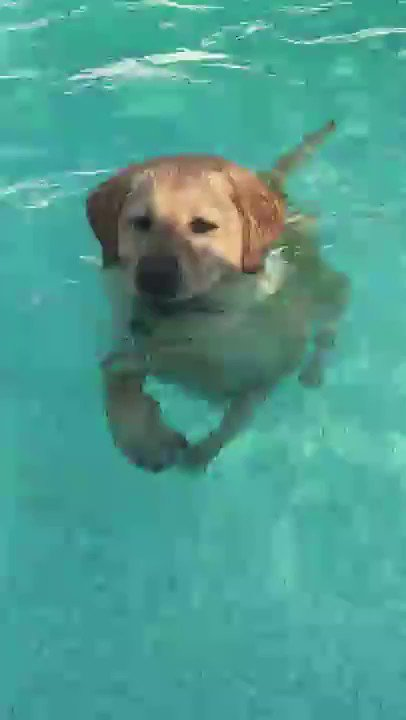

> **A labrador retriever tweet image was the most retweeted** 

### Dog image with the least retweet

In [126]:
least_retweet_df = twitter_archive_master_clean.loc[twitter_archive_master_clean.retweet_count == 11 ]
least_retweet_df.jpg_url

2339    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg
Name: jpg_url, dtype: object

In [127]:
for ind, rw in twitter_archive_master_clean.iterrows():
    if rw['retweet_count']==11:
        pic_url = twitter_archive_master_clean.jpg_url[ind]
        tweet_text = twitter_archive_master_clean.text[ind]
        id =twitter_archive_master_clean.tweet_id[ind]
        print ('img_url: ', pic_url)
        print ('Tweet text: ', tweet_text)
        print ('tweet id: ', id)

img_url:  https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg
Tweet text:  Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq
tweet id:  666102155909144576


In [128]:
#getting dog breed
least_retweet_df.p1

2339    english_setter
Name: p1, dtype: object

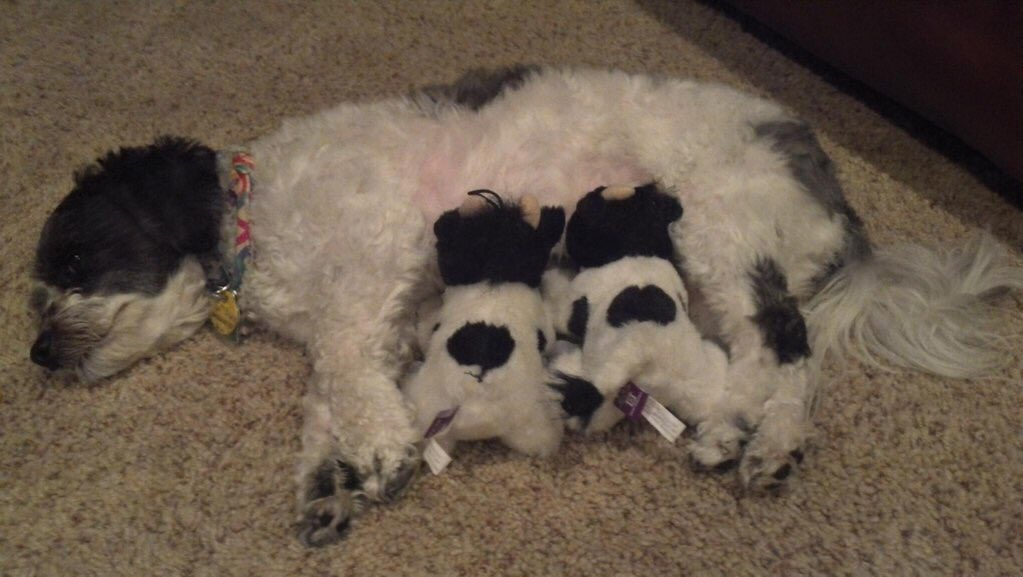

> **An english setter had the east number of retweets**

### Insights on favorites
Assessed data used: api_df<br>
cleaned data used : twitter_archive_master_clean data

In [103]:
twitter_archive_master_clean.favorite_count.describe()

count      1921.000000
mean       7766.771994
std       11546.553143
min           0.000000
25%        1513.000000
50%        3470.000000
75%        9744.000000
max      144847.000000
Name: favorite_count, dtype: float64

In [104]:
highest_favorite_df = twitter_archive_master_clean.loc[twitter_archive_master_clean.favorite_count == 144902 ]
highest_favorite_df.jpg_url

Series([], Name: jpg_url, dtype: object)

In [129]:
# get full image url for the highest favorited tweet
for ind, rw in twitter_archive_master_clean.iterrows():
    if rw['favorite_count']==144847:
        img_url = twitter_archive_master_clean.jpg_url[ind]
        print ('img_url: ', img_url)

img_url:  https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg


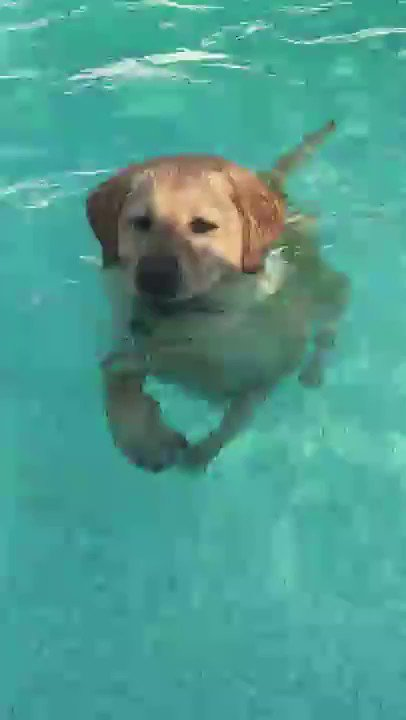

> **The same dog, a labrador retriever based on the tweet image prediction test, had the highest number of favorites and retweets. This makes it the tweet with the most interaction.**

In [106]:
least_favorite_df = twitter_archive_master_clean.loc[twitter_archive_master_clean.favorite_count == 0 ]
least_favorite_df.jpg_url

36        https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg
78        https://pbs.twimg.com/media/DCszHgmW0AAmIpT.jpg
130       https://pbs.twimg.com/media/DAElHfmUMAEH9lB.jpg
160       https://pbs.twimg.com/media/C_KVJjDXsAEUCWn.jpg
231       https://pbs.twimg.com/media/C8SZH1EWAAAIRRF.jpg
                              ...                        
911       https://pbs.twimg.com/media/CoOGZjiWAAEMKGx.jpg
926       https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg
949     https://pbs.twimg.com/ext_tw_video_thumb/67535...
1242    https://pbs.twimg.com/tweet_video_thumb/CeGGkW...
2259      https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg
Name: jpg_url, Length: 70, dtype: object

> **70 dogs had 0 each favorite had the least favorite count. Due to this large number, pictures will not be displayed**

### Most interacted with tweet text

In [130]:
# get full image url for the highest favorited tweet
for ind, rw in twitter_archive_master_clean.iterrows():
    if rw['favorite_count']==144847:
        tweet_text = twitter_archive_master_clean.text[ind]
        print ('Tweet text: ', tweet_text)

Tweet text:  Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4


### Insights on number of tweet images predicted to be a dog based on the prediction test
Assessed data used: img_df<br>
Cleaned data used: twitter_archive_master_clean

In [108]:
twitter_archive_master_clean['image_prediction']. value_counts()

dog        1675
not dog     246
Name: image_prediction, dtype: int64

> **1675 tweet images were predicted to be an image of a dog**

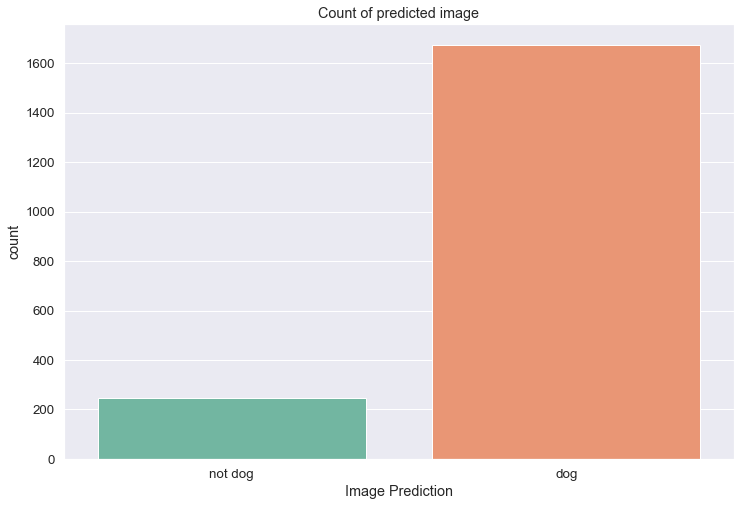

In [109]:
sns.set(rc={'figure.figsize':(12,8)},font_scale =1.2)
ax = sns.countplot(data =twitter_archive_master_clean, x='image_prediction', palette='Set2')
ax.set(xlabel='Image Prediction',ylabel='count', title='Count of predicted image');

> 1675 tweet images were predicted to be dogs

### Insights on Numerator ratings
Assessed data used: twitter_archive<br>
Cleaned data used: twitter_archive_master_clean

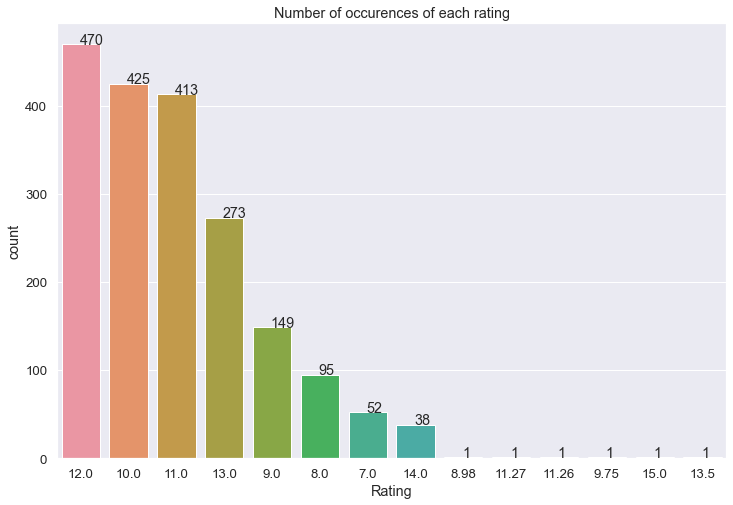

In [131]:
#setting chart size
sns.set(rc={'figure.figsize':(12,8)},font_scale = 1.2)
#plotting a count plot with an order defined
ax = sns.countplot(data = twitter_archive_master_clean, x='rating_numerator'
                  ,order = twitter_archive_master_clean['rating_numerator'].value_counts().index)
ax.set(xlabel='Rating', title='Number of occurences of each rating')
# setting count label for each bar
for p, label in zip(ax.patches, twitter_archive_master_clean['rating_numerator'].value_counts()):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))

> **The most popular numerator rating was 12 with 470 tweets**

### Insights on the highest rated tweet image
Assessed data used: twitter_archive<br>
Cleaned data used: twitter_archive_master_clean

In [111]:
highest_rated = twitter_archive_master_clean.loc[twitter_archive_master_clean.rating_numerator == 15 ]
highest_rated.jpg_url

285    https://pbs.twimg.com/media/C6RkiQZUsAAM4R4.jpg
Name: jpg_url, dtype: object

In [112]:
# get full image url for the highest favorited tweet
for ind, rw in twitter_archive_master_clean.iterrows():
    if rw['rating_numerator']==15:
        tweet_text = twitter_archive_master_clean.text[ind]
        pic_url = twitter_archive_master_clean.jpg_url[ind]
        id = twitter_archive_master_clean.tweet_id[ind]
        retweets = twitter_archive_master_clean.retweet_count[ind]
        favorites = twitter_archive_master_clean.favorite_count[ind]
        print ('pic_url: ', pic_url)
        print ('Tweet text: ', tweet_text)
        print ('Retweets: ', retweets)
        print ('Favorites: ', favorites)

pic_url:  https://pbs.twimg.com/media/C6RkiQZUsAAM4R4.jpg
Tweet text:  RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI
Retweets:  31.0
Favorites:  0.0


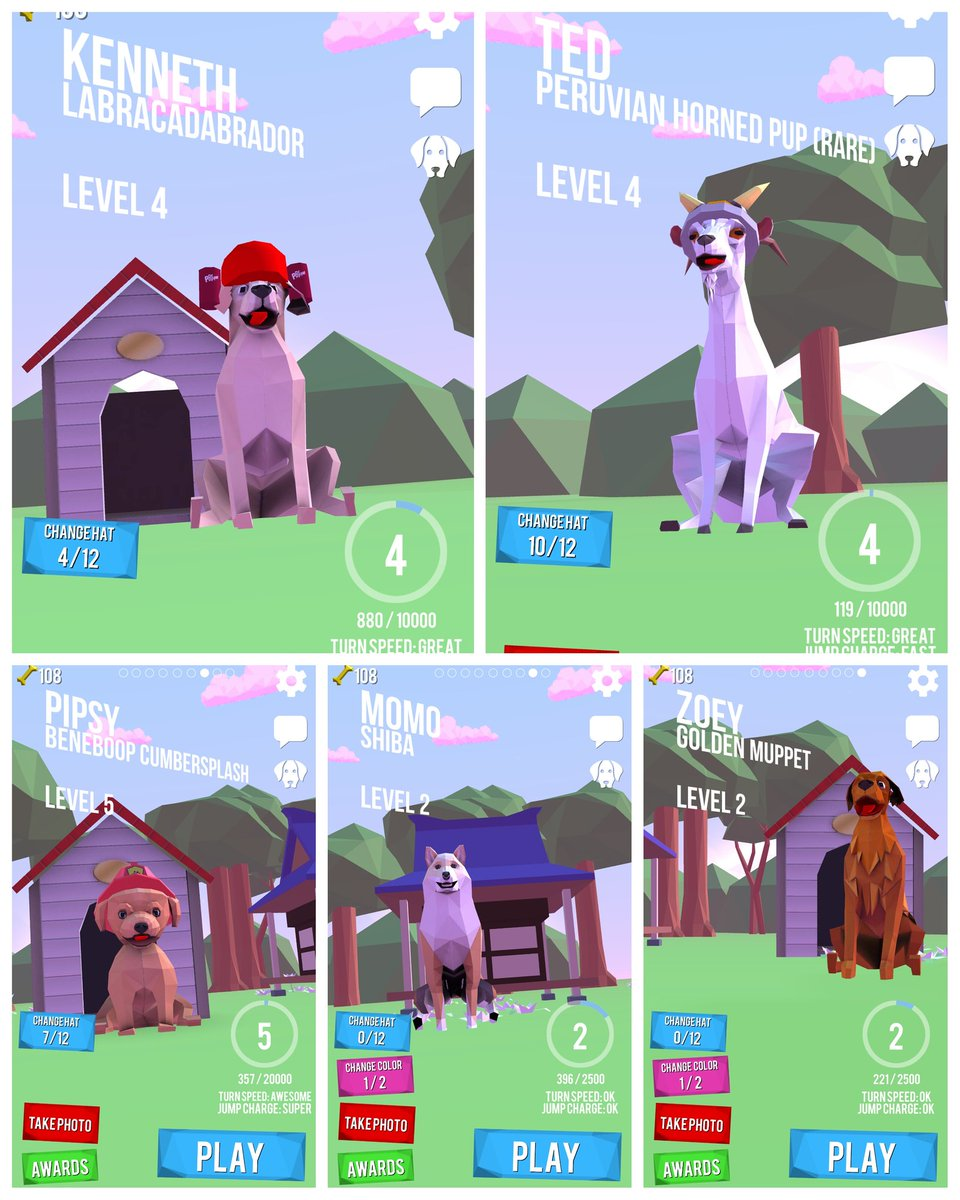

### Insights on tweets per year
assessed data used: twitter_archive_api_clean<br>
cleaned data used: twitter_archive_master_clean

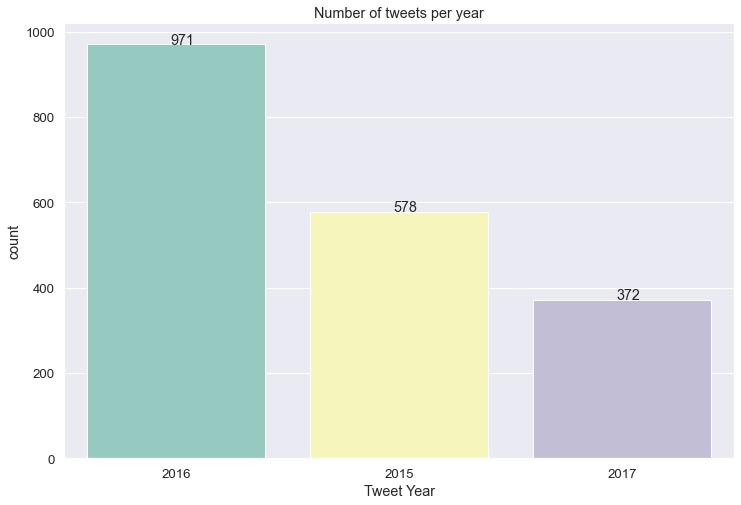

In [113]:
sns.set(rc={'figure.figsize':(12,8)}, font_scale =1.2)
ax = sns.countplot(data = twitter_archive_master_clean, x= 'year',palette="Set3",
                   order = twitter_archive_master_clean['year'].value_counts().index)
ax.set( xlabel='Tweet Year', title='Number of tweets per year')
for p, label in zip(ax.patches, twitter_archive_master_clean['year'].value_counts()):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.3))

> **2016 was the year with the most number of tweets**

### Insights on tweet by month over the three years
assessed data used: twitter_archive_api_clean<br>
cleaned data used: twitter_archive_master_clean

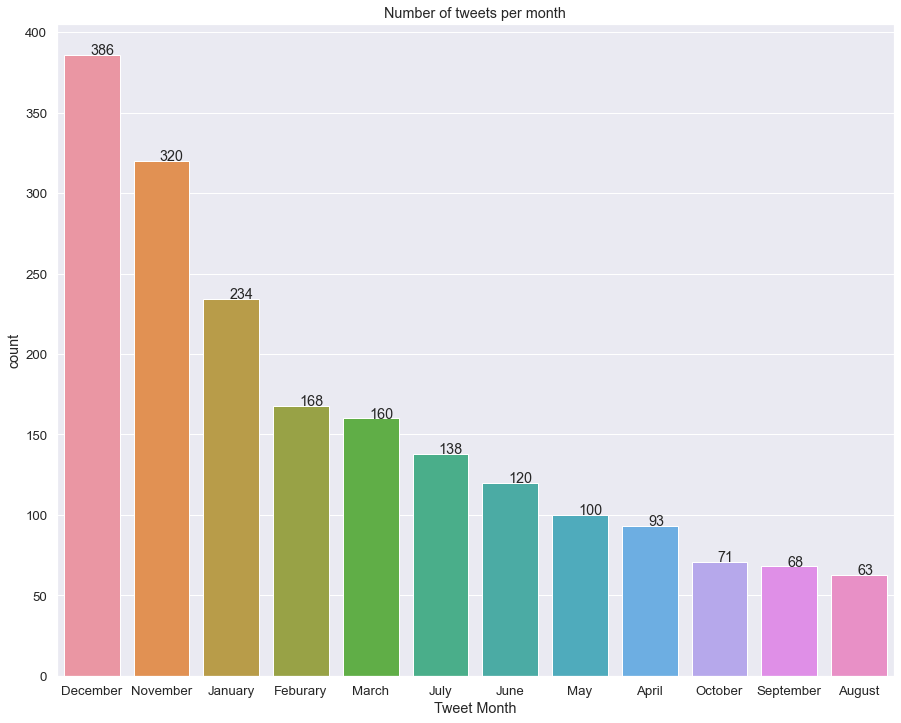

In [114]:
sns.set(rc={'figure.figsize':(15,12)}, font_scale =1.2)
ax = sns.countplot(data = twitter_archive_master_clean, x= 'month',
                   order = twitter_archive_master_clean['month'].value_counts().index
                  )
ax.set( xlabel='Tweet Month', title='Number of tweets per month')
for p, label in zip(ax.patches, twitter_archive_master_clean['month'].value_counts()):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.3))

> **December had more tweets than any other month over the years**

### Insights on correlation between favorite count and Retweet count
assessed data used : twitter_archive_api_clean<br>
cleaned data used : twitter_archive_master_clean

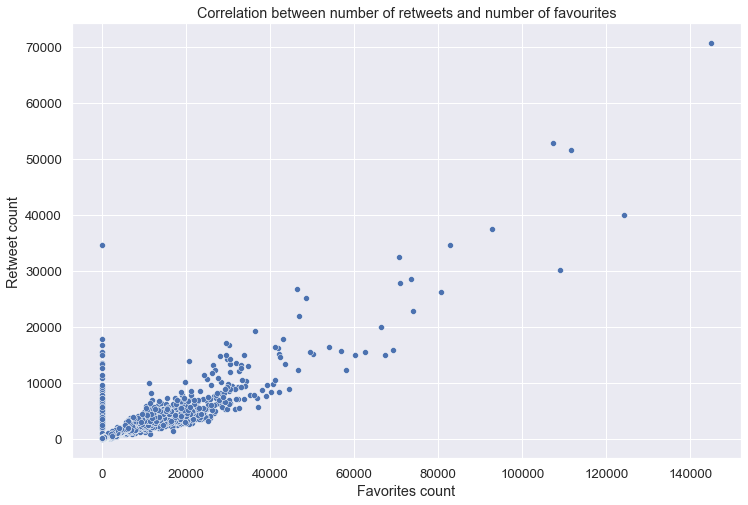

In [115]:
sns.set(rc={'figure.figsize':(12,8)}, font_scale =1.2)
ax =sns.scatterplot(y='retweet_count', x='favorite_count', data =twitter_archive_master_clean)
ax.set(xlabel='Favorites count',ylabel='Retweet count', title='Correlation between number of retweets and number of favourites');

> **There is a positive correlation between number of retweets and number of favourites**

### Insights on dog breeds based on most confident algorithm(p1)
Assessed data used: twitter_archive_master_clean<br>
Cleaned data used: predicted_breed

In [116]:
top_10_dog_breed = predicted_breed['p1'].value_counts().head(10)
top_10_breed_df =top_10_dog_breed.to_frame()


In [117]:
top_10_breed_df  = top_10_breed_df.rename(columns = { 'p1':'count'})
top_10_breed_df =top_10_breed_df.reset_index()

In [118]:
top_10_breed_df = top_10_breed_df.rename(columns = { 'index':'dog_breed'})
top_10_breed_df

,dog_breed,count
0,golden_retriever,147
1,labrador_retriever,93
2,pembroke,84
3,chihuahua,79
4,pug,55
5,chow,44
6,samoyed,42
7,pomeranian,38
8,toy_poodle,38
9,cocker_spaniel,30


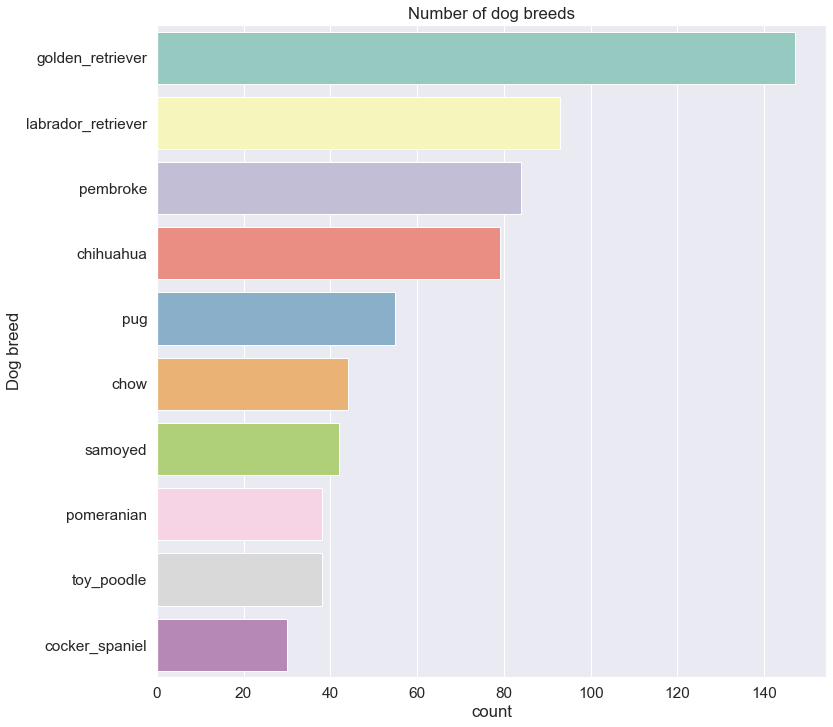

In [119]:
sns.set(rc={'figure.figsize':(12,12)}, font_scale = 1.4)

ax = sns.barplot(data = top_10_breed_df , x= 'count' , y='dog_breed',palette="Set3")
ax.set(ylabel = 'Dog breed', xlabel='count', title='Number of dog breeds');

In [120]:
predicted_breed[predicted_breed['p1']== 'golden_retriever'].p1.value_counts()

golden_retriever    147
Name: p1, dtype: int64

> ** 147 image tweets got a confident prediction of their image as a Golden Retriever, making it the most popular dog breed.**